<a href="https://colab.research.google.com/github/schwarzg/gdg_sigongmo/blob/schwarzg/schwarzg/titanic/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
#Process input data and answer
df_tr=pd.read_csv("/content/gdrive/My Drive/train.csv")
df_te=pd.read_csv("/content/gdrive/My Drive/test.csv")

print df_tr.head()
print df_te.head()


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [30]:
df_tr=df_tr[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
df_tr=df_tr.dropna(how="any")
df_tr=df_tr.replace({"male":0,"female":1,"Q":0,"S":1,"C":2})
print df_tr.head()

df_tr=df_tr.as_matrix()
X_t=df_tr[:,1:]
Y_t=np.array([df_tr[:,0]]).transpose()
ninp=len(X_t[0])
ndat=len(Y_t)

df_te=df_te[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
df_te=df_te.dropna(how="any")
df_te=df_te.replace({"male":0,"female":1,"Q":0,"S":1,"C":2})
X_v=df_te.as_matrix()

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         1
1         1       1    1  38.0      1      0  71.2833         2
2         1       3    1  26.0      0      0   7.9250         1
3         1       1    1  35.0      1      0  53.1000         1
4         0       3    0  35.0      0      0   8.0500         1


In [0]:
#hyper parameters
lr=0.01	#learningrate
epoch_num=1000

def sig(z):
	return 1.0/(1.0+np.exp(-z))
	
def sigd(z):
	sigarr=sig(z)
	return np.multiply(sigarr,(1.0-sigarr))


#Weight matrix
W1=np.random.normal(size=(ninp+1,ninp/2)) #W1[0] is for bias
W2=np.random.normal(size=(ninp/2+1,1)) #W2[0] is for bias

#feedfoward function 
def feedfoward(X,W,B):
	return np.dot(X,W)+B

def cost(Y,Yh):
	delt=-np.multiply(Yh,np.log(Y+1e-8))-np.multiply(1.0-Yh,np.log(1.0-Y+1e-8))
	return np.mean(delt)

def get_gradient(delta,deriv,X):
	D=np.multiply(delta,deriv)
	G=np.dot(X.transpose(),D)
	return G/float(len(delta))

In [32]:
acc=np.array([])
cst=np.array([])
for i in range(epoch_num):

	#feedfoward
	Xin=np.concatenate((np.ones((ndat,1)),X_t),axis=1)
	z1=feedfoward(Xin,W1,0)
	H=sig(z1)
	Hin=np.concatenate((np.ones((ndat,1)),H),axis=1)
	z2=feedfoward(Hin,W2,0)
	Y=sig(z2)
	
	corr=np.equal(np.greater(Y,0.5),Y_t).astype(int)
	acc=np.append(acc,np.mean(corr))
	cst=np.append(cst,cost(Y,Y_t))


	if i%100 is 0 :
		print i, cst[i], acc[i]	
	
	#back propagation, gradient calculation
	#delta=Y-Yh
	delta=(Y-Y_t).astype(float)/((Y+1e-8)*(1.0-Y+1e-8))
	gW2=get_gradient(delta,sigd(z2),Hin)

	delta2=np.dot(np.multiply(delta,sigd(z2)),W2[1:,:].transpose())
	
	gW1=get_gradient(delta2,sigd(z1),Xin)
	
	#update
	W1=W1-lr*gW1
	W2=W2-lr*gW2


0 1.1600734033609885 0.4044943820224719
100 0.8796106174723441 0.4044943820224719
200 0.7527297403887137 0.4044943820224719
300 0.7034731165470116 0.4044943820224719
400 0.6852707104562886 0.5969101123595506
500 0.6785726818309935 0.5955056179775281
600 0.6760883355505984 0.5955056179775281
700 0.6751581833965883 0.5955056179775281
800 0.6748066376857357 0.5955056179775281
900 0.6746720893414688 0.5955056179775281


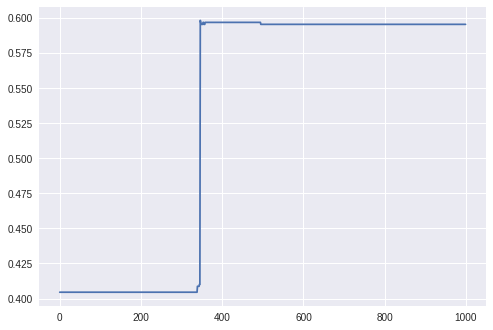

In [33]:
plt.plot(np.arange(epoch_num),acc)
plt.show()